In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [126]:
ff_data_list = []

for year in range(2002, 2019):
    ff_data = pd.read_csv('FF offense '+str(year)+'.csv')
    ff_data['YEAR'] = year
    
    # Remove injury designation from NAME column.
    for N in ff_data.NAME:
        if N[-2:] == ' P' or N[-2:] == ' O' or N[-2:] == ' Q' or N[-2:] == ' D':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-2])
        if N[-3:] == ' IR':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-3])
        if N[-4:] == ' SUS':
            ff_data.NAME = ff_data.NAME.replace(N, N[:-4])
            
    # Correct innaccurate position labels in POS column    
    no_qb = ff_data[ff_data.POS != 'QB']
    no_qb = no_qb[no_qb['PASS YDS'] > 106]
    index_ = no_qb.index.values
    
    for p in no_qb.POS:
        no_qb.POS = no_qb.POS.replace(p, 'QB')
        
    for i in index_:
        ff_data.loc[i] = no_qb.loc[i]
         
    ff_data_list.append(ff_data)

ff_data_list.reverse()
ALL = pd.concat(ff_data_list)
ALL = ALL.reset_index(drop=True)
ALL = ALL[ALL.POS != 'FB']
#ALL = ALL[['YEAR', 'RANK', 'NAME', 'TEAM', 'POS', 'PTS']]

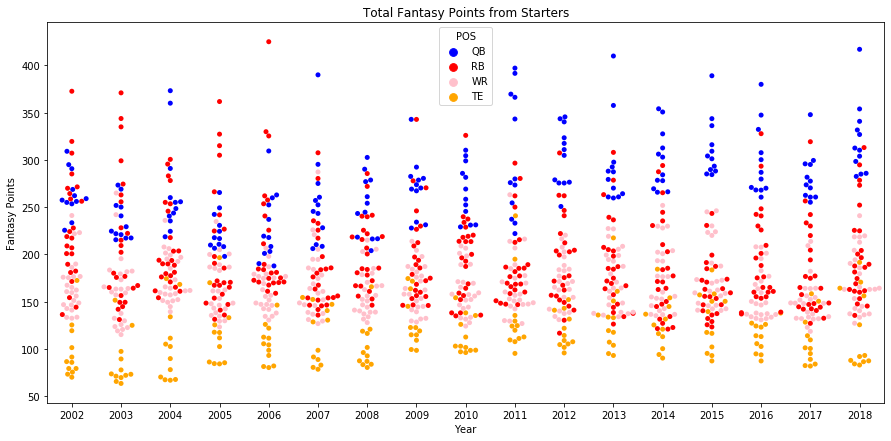

In [225]:
starter = []
position = ['QB', 'RB', 'WR', 'TE']

for year in range(2002, 2019):
    df = ALL[ALL.YEAR == year].copy()
    for pos in position:
        if pos == 'QB' or pos == 'TE':
            starter.append(df[df.POS == pos][:12])
        else:
            starter.append(df[df.POS == pos][:24])
    
TOP = pd.concat(starter)
TOP = TOP.reset_index(drop=True)

list1 = []
for year in range(2002, 2019):
    DF = TOP[TOP.YEAR == year]
    list1.append(DF)

color = {'QB': 'blue', 'RB': 'red', 'WR': 'pink', 'TE': 'orange'}    

plt.figure(figsize=(15,7))
sns.swarmplot(x='YEAR', y='PTS', hue='POS', data=pd.concat(list1), palette=color)
plt.xlabel('Year')
plt.ylabel('Fantasy Points')
plt.title('Total Fantasy Points from Starters')
plt.show()

In [129]:
# Draft simulation based purely on final scoring.

df_year = ALL[ALL.YEAR == 2018].copy()

teams = [([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], []),
         ([], [])]

for i in range(72):
    for team in teams:
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            team[0].append(df_year.loc[df_year.index.min()])
            team[1].append(df_year.loc[df_year.index.min()].POS)
            df_year = df_year.drop(df_year.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'QB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'RB']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[df_year.POS != 'WR']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[df_year.POS != 'TE']
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[(df_year.POS != 'RB') & (df_year.POS != 'WR')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[(df_year.POS != 'QB') & (df_year.POS != 'WR')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'RB')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'WR')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'QB')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
            df = df_year[(df_year.POS != 'QB') & (df_year.POS != 'RB')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'RB') & (df_year.POS != 'WR')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
            df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'QB') & (df_year.POS != 'WR')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
            df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'RB') & (df_year.POS != 'QB')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
        if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
            df = df_year[(df_year.POS != 'QB') & (df_year.POS != 'RB') & (df_year.POS != 'WR')]
            team[0].append(df_year.loc[df.index.min()])
            team[1].append(df_year.loc[df.index.min()].POS)
            df_year = df_year.drop(df.index.min())
            continue
    teams.reverse()
    
league = []
for team in teams:
    TEAM = pd.DataFrame(team[0])
    league.append(TEAM)

pts_sums = []
QB_pts = []
RB_pts = []
WR_pts = []
TE_pts = []

for team in league:
    pts_sums.append(team.PTS.sum())
    QB_pts.append(team[team.POS == 'QB'].PTS.item())
    RB_pts.append(team[team.POS == 'RB'].PTS.sum())
    WR_pts.append(team[team.POS == 'WR'].PTS.sum())
    TE_pts.append(team[team.POS == 'TE'].PTS.item())
    
team_names = ['TEAM 1', 'TEAM 2', 'TEAM 3', 'TEAM 4', 'TEAM 5', 'TEAM 6', 
              'TEAM 7', 'TEAM 8', 'TEAM 9', 'TEAM 10', 'TEAM 11', 'TEAM 12']
    
data = {'TEAM': team_names, 'TOTAL PTS': pts_sums, 'QB PTS': QB_pts, 
        'RB PTS': RB_pts, 'WR PTS': WR_pts, 'TE PTS': TE_pts}
league_stats = pd.DataFrame(data).sort_values('TOTAL PTS', ascending=False)
league_stats['LEAGUE RNK'] = range(1,13)
league_stats = league_stats[['TEAM', 'LEAGUE RNK', 'TOTAL PTS', 'QB PTS', 'RB PTS', 'WR PTS', 'TE PTS']]
league_stats

,TEAM,LEAGUE RNK,TOTAL PTS,QB PTS,RB PTS,WR PTS,TE PTS
5,TEAM 6,1,1240.44,282.60,448.60,317.64,191.6
0,TEAM 1,2,1240.08,417.08,322.70,417.30,83.0
1,TEAM 2,3,1223.02,353.96,367.14,345.72,156.2
9,TEAM 10,4,1205.20,298.42,459.56,276.52,170.7
11,TEAM 12,5,1188.06,285.86,459.90,316.70,125.6
6,TEAM 7,6,1171.70,312.58,370.90,323.92,164.3
10,TEAM 11,7,1170.52,285.02,469.30,323.10,93.1
2,TEAM 3,8,1167.06,340.86,360.40,381.60,84.2
3,TEAM 4,9,1150.80,331.70,349.80,382.80,86.5
4,TEAM 5,10,1144.42,326.92,372.60,357.50,87.4


In [5]:
league[5]

,RANK,NAME,TEAM,POS,GMS,PASS YDS,PASS TDS,INT,RUSH YDS,RUSH TDS,REC,REC YDS,REC TDS,FUM LST,PTS / GM,PTS,YEAR
5,6,Todd Gurley,LAR,RB,14,0,0,0,1251,17,59,580,4,1,22.4,313.10,2018
13,14,Cam Newton,CAR,QB,14,3395,24,13,488,4,0,0,0,0,20.2,282.60,2018
40,41,Travis Kelce,KC,TE,16,0,0,0,0,0,103,1336,10,1,12.0,191.60,2018
58,58,Stefon Diggs,MIN,WR,15,0,0,0,62,0,102,1021,9,0,11.0,164.30,2018
68,69,Odell Beckham Jr,NYG,WR,12,106,2,0,19,0,77,1052,6,1,12.8,153.34,2018
81,82,Matt Breida,SF,RB,14,0,0,0,814,3,27,261,2,1,9.7,135.50,2018


In [4]:
# # Draft simulation based purely on final scoring with randomness run 1000 times.

# pick_range = 9
# winners_by_year = []

# for year in range(2002, 2019):
#     winners = []
#     for draft in range(0,1000):
#         df_year = ALL[ALL.YEAR == year].copy()

#         teams = [([], []),
#                  ([], []),
#                  ([], []),
#                  ([], []),
#                  ([], []),
#                  ([], []),
#                  ([], []),
#                  ([], []),
#                  ([], []),
#                  ([], []),
#                  ([], []),
#                  ([], [])]

#         for i in range(72):
#             for team in teams:
#                 if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
#                     pick = df_year[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
#                     df = df_year[df_year.POS != 'QB']
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
#                     df = df_year[df_year.POS != 'RB']
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
#                     df = df_year[df_year.POS != 'WR']
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
#                     df = df_year[df_year.POS != 'TE']
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
#                     df = df_year[(df_year.POS != 'RB') & (df_year.POS != 'WR')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
#                     df = df_year[(df_year.POS != 'QB') & (df_year.POS != 'WR')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
#                     df = df_year[(df_year.POS != 'RB') & (df_year.POS != 'TE')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') < 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
#                     df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'WR')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
#                     df = df_year[(df_year.POS != 'QB') & (df_year.POS != 'TE')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') < 1:
#                     df = df_year[(df_year.POS != 'QB') & (df_year.POS != 'RB')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') < 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
#                     df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'RB') & (df_year.POS != 'WR')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') == 1 and team[1].count('RB') < 2 and team[1].count('WR') == 2 and team[1].count('TE') == 1:
#                     df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'QB') & (df_year.POS != 'WR')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') < 2 and team[1].count('TE') == 1:
#                     df = df_year[(df_year.POS != 'TE') & (df_year.POS != 'RB') & (df_year.POS != 'QB')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#                 if team[1].count('QB') == 1 and team[1].count('RB') == 2 and team[1].count('WR') == 2 and team[1].count('TE') < 1:
#                     df = df_year[(df_year.POS != 'QB') & (df_year.POS != 'RB') & (df_year.POS != 'WR')]
#                     pick = df[:pick_range].sample().index.item()
#                     team[0].append(df_year.loc[pick])
#                     team[1].append(df_year.loc[pick].POS)
#                     df_year = df_year.drop(pick)
#                     continue
#             teams.reverse()

#         league2 = []
#         for team in teams:
#             TEAM = pd.DataFrame(team[0])
#             league2.append(TEAM)

#         pts_sums = []
#         most_points = 0
#         for team in league2:
#             pts_sums.append(team.PTS.sum())
#             if team.PTS.sum() > most_points:
#                 most_points = team.PTS.sum()
#                 best_team = team

#         winners.append(best_team)
#     winners_by_year.append(winners)

In [5]:
winner_stats = []
player_counts = []
for i in range(17):
    D = pd.concat(winners_by_year[i])
    means = D.groupby('POS').PTS.mean()
    percent_of_means = means/means.sum()*100
    sums = D.groupby('POS').PTS.sum()
    percent_of_sums = sums/sums.sum()*100
    stats = [means, percent_of_means, percent_of_sums]
    winner_stats.append(stats)
    player_counts.append((D.NAME.value_counts()/10).head(10))

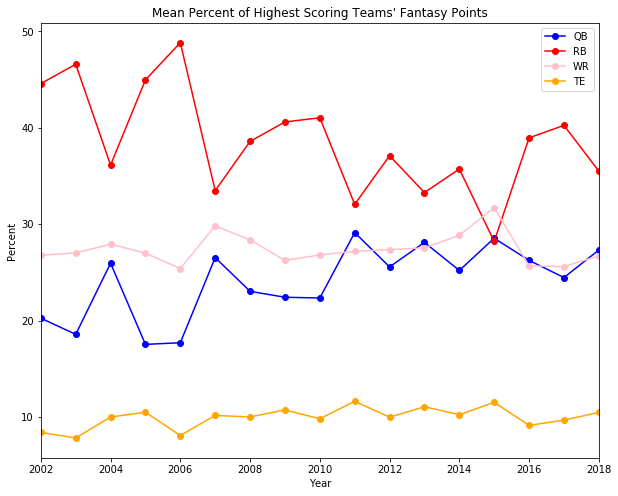

In [226]:
positions = ['QB', 'RB', 'WR', 'TE']
player_percent = []

for pos in positions:
    list1 = []
    for i in range(17):
        list1.append(winner_stats[i][2][pos])
    player_percent.append(list1)
    
player_percent_yr = pd.DataFrame({'QB': player_percent[0], 'RB': player_percent[1], 
                                'WR': player_percent[2], 'TE': player_percent[3]})
player_percent_yr.index = range(2002, 2019)
player_percent_yr.plot(figsize=(10,8), marker='o', color=['blue', 'red', 'pink', 'orange'])
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title("Mean Percent of Highest Scoring Teams' Fantasy Points")
plt.show()

In [108]:
OLS_QB_RB_perc = ols('QB ~ RB',player_percent_yr).fit()
print(OLS_QB_RB_perc.summary())

                            OLS Regression Results                            
Dep. Variable:                     QB   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     123.5
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           1.22e-08
Time:                        15:59:58   Log-Likelihood:                -27.202
No. Observations:                  17   AIC:                             58.40
Df Residuals:                      15   BIC:                             60.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.7878      2.247     21.713      0.0

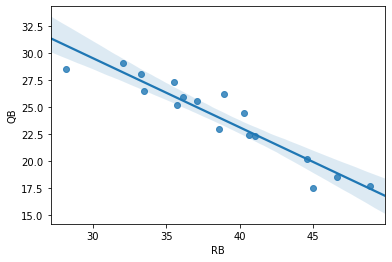

In [110]:
sns.regplot(y="QB", x="RB", data=player_percent_yr, fit_reg = True)
plt.show()

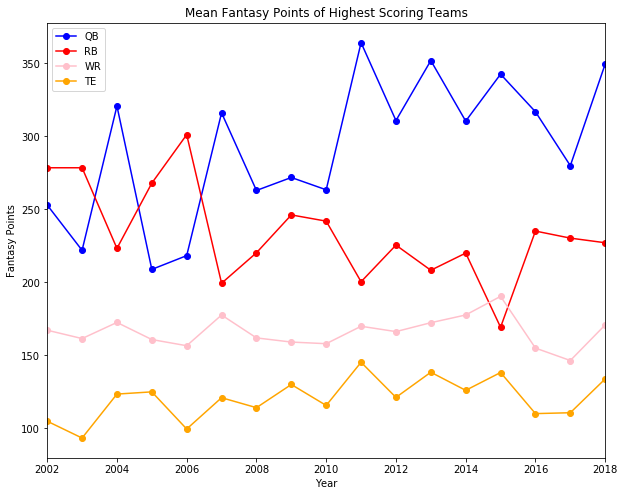

In [227]:
positions = ['QB', 'RB', 'WR', 'TE']
player_mean = []

for pos in positions:
    list1 = []
    for i in range(17):
        list1.append(winner_stats[i][0][pos])
    player_mean.append(list1)
    
player_mean_yr = pd.DataFrame({'QB': player_mean[0], 'RB': player_mean[1], 
                                'WR': player_mean[2], 'TE': player_mean[3]})
player_mean_yr.index = range(2002, 2019)
player_mean_yr.plot(figsize=(10,8), marker='o', color=['blue', 'red', 'pink', 'orange'])
plt.xlabel('Year')
plt.ylabel('Fantasy Points')
plt.title("Mean Fantasy Points of Highest Scoring Teams")
plt.show()

In [264]:
player_counts[16]

Patrick Mahomes        36.3
Todd Gurley            24.2
Alvin Kamara           19.6
Saquon Barkley         19.0
Christian McCaffrey    17.3
Tyreek Hill            15.5
Eric Ebron             15.2
Ezekiel Elliott        13.7
Travis Kelce           13.7
George Kittle          13.4
Name: NAME, dtype: float64

In [260]:
ALL[ALL.YEAR == 2009].head(7)

,RANK,NAME,TEAM,POS,GMS,PASS YDS,PASS TDS,INT,RUSH YDS,RUSH TDS,REC,REC YDS,REC TDS,FUM LST,PTS / GM,PTS,YEAR
2700,1,Aaron Rodgers,GB,QB,16,4434,30,7,316,5,0,0,0,4,21.4,342.96,2009
2701,2,Chris Johnson,TEN,RB,16,0,0,0,2006,14,50,503,2,3,21.4,342.90,2009
2702,3,Drew Brees,NO,QB,15,4388,34,11,33,2,1,-4,0,6,19.5,292.42,2009
2703,4,Brett Favre,MIN,QB,16,4202,33,7,7,0,1,-2,0,2,17.7,282.58,2009
2704,5,Matt Schaub,HOU,QB,16,4770,29,15,57,0,0,0,0,2,17.5,280.50,2009
2705,6,Peyton Manning,IND,QB,16,4500,33,16,-13,0,0,0,0,0,17.4,278.70,2009
2706,7,Adrian Peterson,MIN,RB,16,0,0,0,1383,18,43,436,0,6,17.4,277.90,2009


In [63]:
performances = []
for j in range(3):
    most_occuring = []
    percents = []
    most_position = []
    for i in range(len(player_counts)):
        most_occuring.append(player_counts[i].index[j])
        percents.append(player_counts[i][j])
    for name in most_occuring:
        most_position.append(ALL[ALL.NAME == name].POS.unique().item())
    data = {'NAME': most_occuring, 'POS': most_position, 'OWNED BY %': percents}
    best = pd.DataFrame(data)
    performances.append(best)

In [64]:
X = performances[0].copy()
print(X.POS.value_counts()/X.POS.count()*100)
print(X.POS.value_counts())

RB    64.705882
QB    35.294118
Name: POS, dtype: float64
RB    11
QB     6
Name: POS, dtype: int64


In [16]:
pos = []

DDFF = pd.concat(player_counts).to_frame()
DDFF = DDFF.reset_index()
DDFF = DDFF.rename(columns={"index": "NAME", "NAME": "PERCENTS"})
for name in DDFF.NAME:
        pos.append(ALL[ALL.NAME == name].POS.unique().item())
        
P = pd.Series(pos)
print(P.value_counts())
print(P.value_counts()/len(P)*100)

RB    69
TE    42
WR    31
QB    28
dtype: int64
RB    40.588235
TE    24.705882
WR    18.235294
QB    16.470588
dtype: float64


In [261]:
top_player = []
for year in range(2002, 2019):
    df_season = ALL[ALL.YEAR == year]
    top_player.append(df_season.loc[df_season.index.min()].POS)

data = {'POS': top_player}
top_player_df = pd.DataFrame(data)

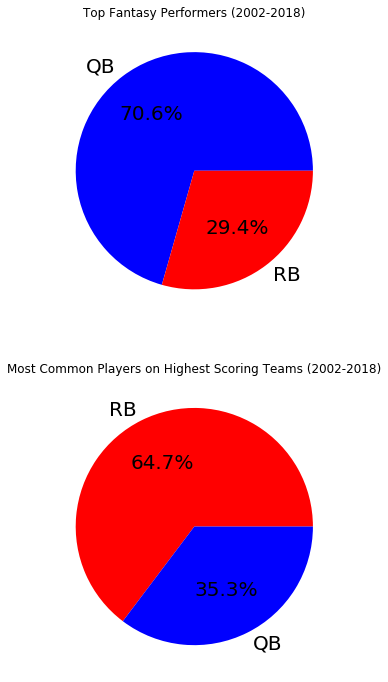

In [265]:
plt.figure(figsize=(12,12))
plt.subplot(212)
(X.POS.value_counts()/X.POS.count()*100).plot.pie(colors=['red', 'blue'], autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Most Common Players on Highest Scoring Teams (2002-2018)')
plt.ylabel('')
plt.subplot(211)
(top_player_df.POS.value_counts()/len(P)*100).plot.pie(colors=['blue', 'red'], autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Top Fantasy Performers (2002-2018)')
plt.ylabel('')
plt.show()

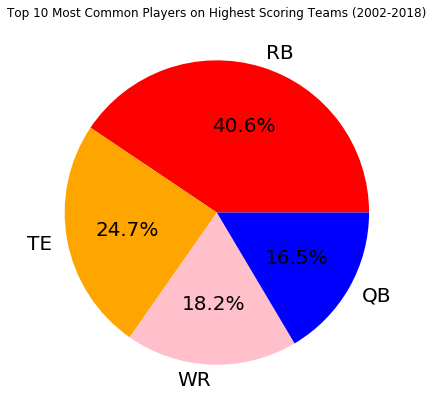

In [246]:
plt.figure(figsize=(7,7))
(P.value_counts()/len(P)*100).plot.pie(colors=['red', 'orange', 'pink', 'blue'], autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Top 10 Most Common Players on Highest Scoring Teams (2002-2018)')
plt.ylabel('')
plt.show()

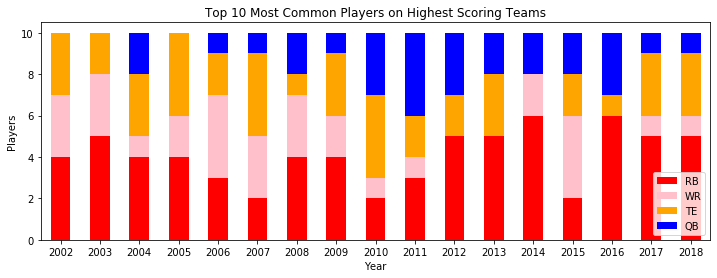

In [229]:
list_x = []
for i in range(len(player_counts)):
    pos = []
    DF_X = player_counts[i].to_frame()
    DF_X = DF_X.reset_index()
    DF_X = DF_X.rename(columns={"index": "NAME", "NAME": "PERCENTS"})
    for name in DF_X.NAME:
        pos.append(ALL[ALL.NAME == name].POS.unique().item())
    DF_X['POS'] = pos
    series_x = DF_X.POS.value_counts()
    list_x.append(series_x)

DF_Z = pd.DataFrame(list_x)
DF_Z.index = range(2002, 2019)
DF_Z.plot(kind='bar', color=['red', 'pink', 'orange', 'blue'], figsize=(12,4), rot=0, stacked=True)
plt.xlabel('Year')
plt.ylabel('Players')
plt.title('Top 10 Most Common Players on Highest Scoring Teams')
plt.legend(loc='lower right')
plt.show()